In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler


In [17]:
np.random.seed(42)
time_steps = 200
data = np.sin(np.linspace(0, 20, time_steps)) + np.random.normal(0, 0.2, time_steps)

In [18]:
df = pd.DataFrame(data)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [19]:
def create_sequences(data,window_size):
    x,y=[],[]
    for i in range(len(data)-window_size):
        x.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(x),np.array(y)
window_size = 10
x,y = create_sequences(data,window_size)

In [20]:
split=int(len(x)*0.8)
x_train,x_test=x[:split],x[split:]
y_train,y_test=y[:split],y[split:]

print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

# Reshape for LSTM input (samples, timesteps, features)
X_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
X_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))
print(x_train.shape, x_test.shape)


(152, 10) (152,) (38, 10) (38,)
(152, 10) (38, 10)


In [25]:
model = Sequential([
    LSTM(50, activation='relu', input_shape=(window_size, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, verbose=2)


Epoch 1/20
5/5 - 1s - loss: 0.4970 - 767ms/epoch - 153ms/step
Epoch 2/20
5/5 - 0s - loss: 0.4197 - 14ms/epoch - 3ms/step
Epoch 3/20
5/5 - 0s - loss: 0.3533 - 18ms/epoch - 4ms/step
Epoch 4/20
5/5 - 0s - loss: 0.2976 - 14ms/epoch - 3ms/step
Epoch 5/20
5/5 - 0s - loss: 0.2528 - 13ms/epoch - 3ms/step
Epoch 6/20
5/5 - 0s - loss: 0.2243 - 14ms/epoch - 3ms/step
Epoch 7/20
5/5 - 0s - loss: 0.1908 - 15ms/epoch - 3ms/step
Epoch 8/20
5/5 - 0s - loss: 0.1548 - 16ms/epoch - 3ms/step
Epoch 9/20
5/5 - 0s - loss: 0.1243 - 12ms/epoch - 2ms/step
Epoch 10/20
5/5 - 0s - loss: 0.1128 - 17ms/epoch - 3ms/step
Epoch 11/20
5/5 - 0s - loss: 0.1081 - 14ms/epoch - 3ms/step
Epoch 12/20
5/5 - 0s - loss: 0.0991 - 14ms/epoch - 3ms/step
Epoch 13/20
5/5 - 0s - loss: 0.0952 - 14ms/epoch - 3ms/step
Epoch 14/20
5/5 - 0s - loss: 0.0907 - 17ms/epoch - 3ms/step
Epoch 15/20
5/5 - 0s - loss: 0.0871 - 22ms/epoch - 4ms/step
Epoch 16/20
5/5 - 0s - loss: 0.0841 - 15ms/epoch - 3ms/step
Epoch 17/20
5/5 - 0s - loss: 0.0803 - 16ms/epo

In [30]:
y_pred = model.predict(X_test)

# Reshape y_test to 2D before inverse scaling
y_test_reshaped = y_test.reshape(-1, 1)

# Inverse transform
y_test_inv = scaler.inverse_transform(y_test_reshaped)
y_pred_inv = scaler.inverse_transform(y_pred)



2/2 [==============================] - 0s 9ms/step


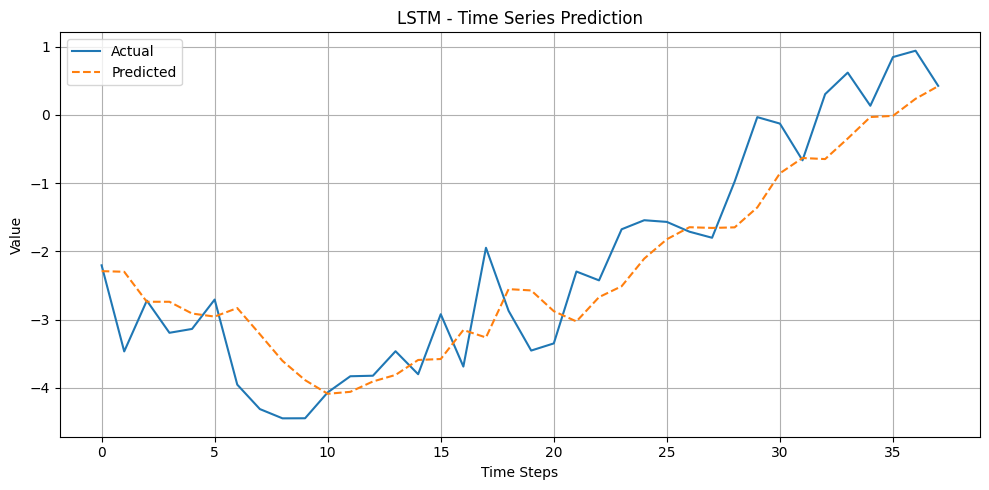

In [32]:

# Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted', linestyle='--')
plt.title("LSTM - Time Series Prediction")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()